Data Dictionary

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates




# First try with Linear regression. Then try with ridge,lasso and elastic regression to find if you can optimize the model. Good luck!

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix   
%matplotlib inline

In [412]:
data = pd.read_csv('cancer_reg.csv',encoding='ISO-8859-1')

In [413]:
data.shape

(3047, 34)

In [414]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [415]:
data.iloc[:,0:20].head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4


In [416]:
data.iloc[:,20:40].head()

,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [418]:
# finding the columnns containing only object data type
data.select_dtypes(include=['object']).columns

Index(['binnedInc', 'Geography'], dtype='object')

In [419]:
# value counts of the column 'binnedInc'
data['binnedInc'].value_counts()

(54545.6, 61494.5]    306
[22640, 34218.1]      306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

In [420]:
# counting unique values in 'binnedInc' column
data['binnedInc'].nunique()

10

In [421]:
# label encoding of the 'binnedInc' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['binnedInc'] = le.fit_transform(data['binnedInc'])
data['binnedInc'].value_counts()

7    306
9    306
4    306
5    305
3    305
6    305
1    304
2    304
0    304
8    302
Name: binnedInc, dtype: int64

In [422]:
data['binnedInc']

0       8
1       5
2       5
3       3
4       5
       ..
3042    4
3043    5
3044    6
3045    5
3046    2
Name: binnedInc, Length: 3047, dtype: int32

In [423]:
data['Geography'].value_counts()

Kitsap County, Washington            1
Ralls County, Missouri               1
Pemiscot County, Missouri            1
Perry County, Missouri               1
Pettis County, Missouri              1
                                    ..
San Bernardino County, California    1
Cullman County, Alabama              1
San Diego County, California         1
San Francisco County, California     1
Geary County, Kansas                 1
Name: Geography, Length: 3047, dtype: int64

In [424]:
# dropping the column 'Geography'
data.drop(['Geography'], axis=1, inplace=True)

In [425]:
# finding columns containing null values 
data.isnull().sum()[data.isnull().sum()>0]

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

In [426]:
data['PctSomeCol18_24']

0       42.1
1       64.0
2        NaN
3       36.1
4       40.0
        ... 
3042     NaN
3043    35.6
3044    33.3
3045     NaN
3046    43.9
Name: PctSomeCol18_24, Length: 3047, dtype: float64

<AxesSubplot:>

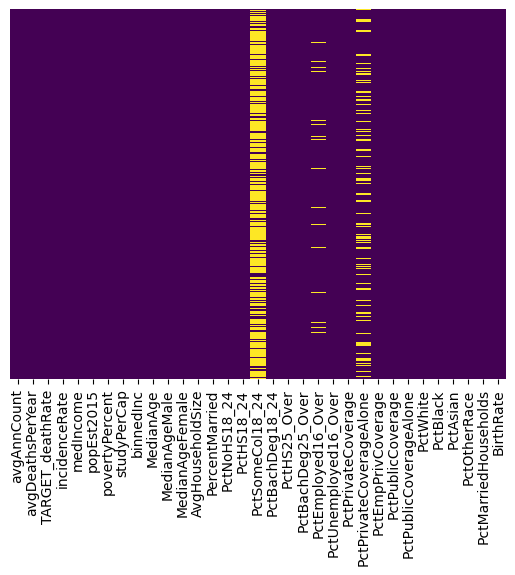

In [427]:
# heatmap of the null values in the data 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [428]:
# dropping the column 'PctSomeCol18_24'
data.drop(['PctSomeCol18_24'], axis=1, inplace=True)

In [429]:
data['PctEmployed16_Over']

0       51.9
1       55.9
2       45.9
3       48.3
4       48.2
        ... 
3042    51.7
3043    70.1
3044    64.8
3045     NaN
3046    48.8
Name: PctEmployed16_Over, Length: 3047, dtype: float64

In [430]:
data['PctEmployed16_Over'].value_counts()

51.9    20
48.9    20
57.9    20
54.2    19
59.7    19
        ..
34.3     1
73.6     1
32.8     1
35.1     1
68.6     1
Name: PctEmployed16_Over, Length: 409, dtype: int64

54.15264248704645
54.5
0    48.9
1    51.9
2    57.9
Name: PctEmployed16_Over, dtype: float64
80.1
17.6
-0.3876487457653264


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctEmployed16_Over', ylabel='Density'>

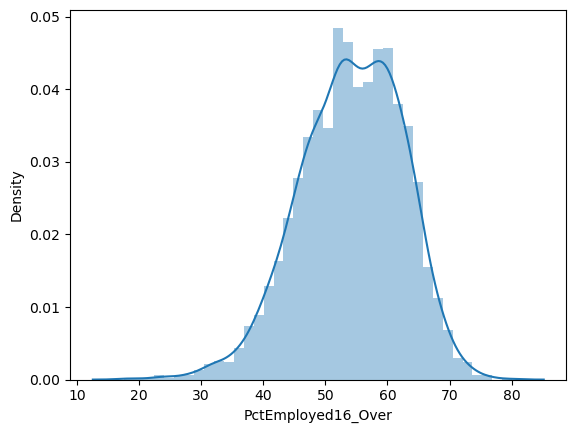

In [431]:
# mean of PctEmployed16_Over
print(data['PctEmployed16_Over'].mean())

# median of PctEmployed16_Over
print(data['PctEmployed16_Over'].median())

# mode of PctEmployed16_Over
print(data['PctEmployed16_Over'].mode())

# maximum value of 'PctEmployed16_Over'
print(data['PctEmployed16_Over'].max())

# minimum value of 'PctEmployed16_Over'
print(data['PctEmployed16_Over'].min())

# skewness of 'PctEmployed16_Over'
print(data['PctEmployed16_Over'].skew())

# distribution of the data['PctEmployed16_Over']
sns.distplot(data['PctEmployed16_Over'])

In [432]:
# filling the null values with ffill method
data['PctEmployed16_Over'].fillna(method='ffill',inplace=True)

In [433]:
# skewness of 'PctEmployed16_Over' after filling the null values
print(data['PctEmployed16_Over'].skew())

-0.38915105783377235


In [434]:
# checking the null values in the data
data.isnull().sum()[data.isnull().sum()>0]

PctPrivateCoverageAlone    609
dtype: int64

In [435]:
data['PctPrivateCoverageAlone']

0        NaN
1       53.8
2       43.5
3       40.3
4       43.9
        ... 
3042    54.9
3043    53.3
3044    52.6
3045    56.3
3046    60.3
Name: PctPrivateCoverageAlone, Length: 3047, dtype: float64

In [436]:
data['PctPrivateCoverageAlone'].value_counts()

53.0    16
53.8    14
50.6    14
51.7    14
49.6    14
        ..
24.5     1
71.1     1
24.4     1
71.3     1
15.7     1
Name: PctPrivateCoverageAlone, Length: 459, dtype: int64

48.45377358490559
48.7
0    53.0
Name: PctPrivateCoverageAlone, dtype: float64
78.9
15.7
-0.009914923093151362


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctPrivateCoverageAlone', ylabel='Density'>

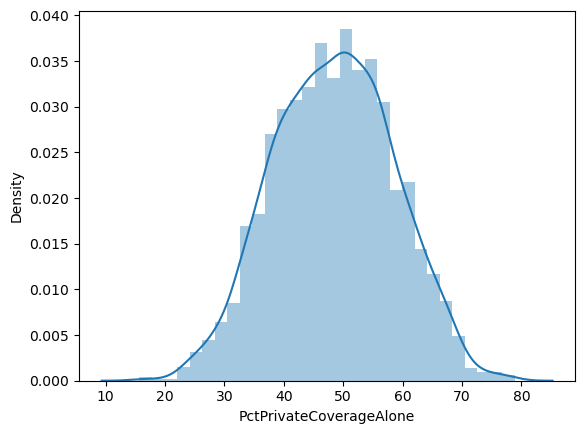

In [437]:
# mean 
print(data['PctPrivateCoverageAlone'].mean())

# median 
print(data['PctPrivateCoverageAlone'].median())

# mode 
print(data['PctPrivateCoverageAlone'].mode())

# maximum value 
print(data['PctPrivateCoverageAlone'].max())

# minimum value  
print(data['PctPrivateCoverageAlone'].min())

# skewness 
print(data['PctPrivateCoverageAlone'].skew())

# distribution 
sns.distplot(data['PctPrivateCoverageAlone'])

In [438]:
# fill the null values with ffill method
data['PctPrivateCoverageAlone'].fillna(method='ffill',inplace=True)

In [439]:
# skewness of 'PctPrivateCoverageAlone' after filling the null values
print(data['PctPrivateCoverageAlone'].skew())

-0.03765674023976124


In [440]:
data.shape

(3047, 32)

In [441]:
data['avgAnnCount']

0       1397.000000
1        173.000000
2        102.000000
3        427.000000
4         57.000000
           ...     
3042    1962.667684
3043    1962.667684
3044    1962.667684
3045    1962.667684
3046    1962.667684
Name: avgAnnCount, Length: 3047, dtype: float64

In [442]:
data['avgAnnCount'].value_counts()

1962.667684     206
81.000000        20
61.000000        19
48.000000        18
102.000000       17
               ... 
815.000000        1
1601.000000       1
1625.000000       1
38150.000000      1
509.000000        1
Name: avgAnnCount, Length: 929, dtype: int64

606.3385437820798
171.0
0    1962.667684
Name: avgAnnCount, dtype: float64
38150.0
6.0
10.680460336510137


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgAnnCount', ylabel='Density'>

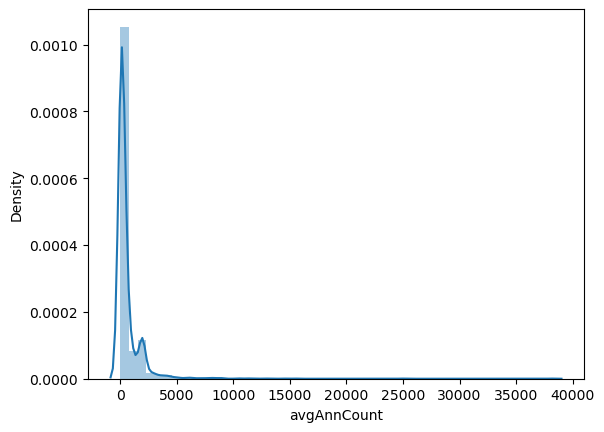

In [443]:
# mean 
print(data['avgAnnCount'].mean())

# median 
print(data['avgAnnCount'].median())

# mode 
print(data['avgAnnCount'].mode())

# maximum value 
print(data['avgAnnCount'].max())

# minimum value 
print(data['avgAnnCount'].min())

# skewness 
print(data['avgAnnCount'].skew())

# distribution 
sns.distplot(data['avgAnnCount'])

In [444]:
# log transformation of avgAnnCount
data['avgAnnCount'] = np.log(data['avgAnnCount'])

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgAnnCount', ylabel='Density'>

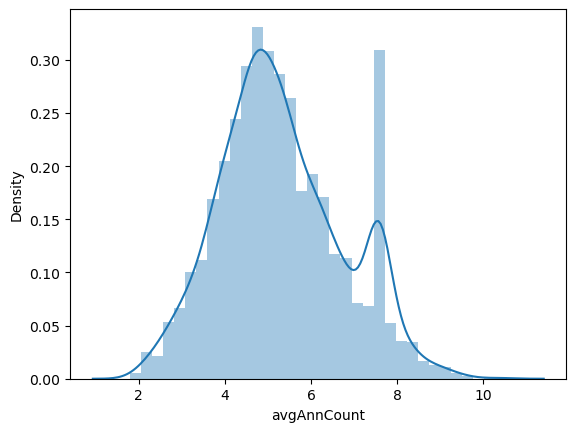

In [445]:
# distribution of avgAnnCount after log transformation
sns.distplot(data['avgAnnCount'])

In [446]:
# max avgAnnCount
print(data['avgAnnCount'].max())

# min avgAnnCount
print(data['avgAnnCount'].min())

# mean avgAnnCount
print(data['avgAnnCount'].mean())

# median avgAnnCount
print(data['avgAnnCount'].median())

# mode avgAnnCount
print(data['avgAnnCount'].mode())

# skewness of avgAnnCount
print(data['avgAnnCount'].skew())

10.549281036712603
1.791759469228055
5.322180117742093
5.14166355650266
0    7.58206
Name: avgAnnCount, dtype: float64
0.33438336834896837


In [447]:
data['avgDeathsPerYear']

0       469
1        70
2        50
3       202
4        26
       ... 
3042     15
3043     43
3044     46
3045     52
3046     48
Name: avgDeathsPerYear, Length: 3047, dtype: int64

In [448]:
data['avgDeathsPerYear'].value_counts()

13       40
24       39
14       37
16       37
15       35
         ..
551       1
14010     1
176       1
565       1
778       1
Name: avgDeathsPerYear, Length: 608, dtype: int64

185.9658680669511
61.0
0    13
Name: avgDeathsPerYear, dtype: int64
14010
3
11.949187831315413


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgDeathsPerYear', ylabel='Density'>

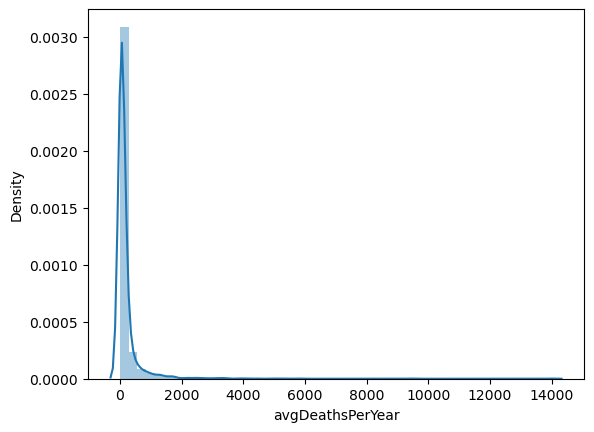

In [449]:
# mean
print(data['avgDeathsPerYear'].mean())

# median
print(data['avgDeathsPerYear'].median())

# mode
print(data['avgDeathsPerYear'].mode())

# maximum 
print(data['avgDeathsPerYear'].max())

# minimum 
print(data['avgDeathsPerYear'].min())

# skewness        
print(data['avgDeathsPerYear'].skew())

# distribution 
sns.distplot(data['avgDeathsPerYear'])

9.547526639331053
1.0986122886681098
4.213906756146443
4.110873864173311
0    2.564949
Name: avgDeathsPerYear, dtype: float64
0.405486726217226


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgDeathsPerYear', ylabel='Density'>

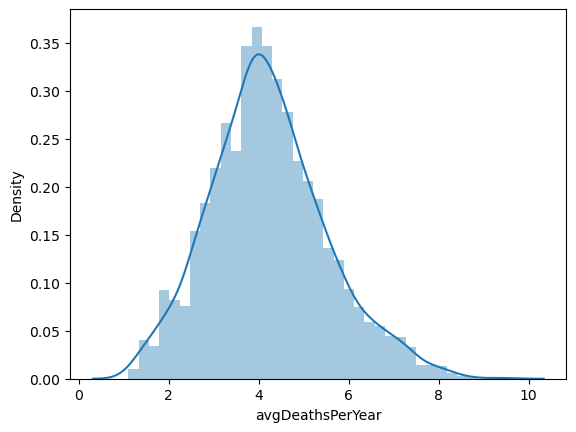

In [450]:
# log transformation of avgDeathsPerYear
data['avgDeathsPerYear'] = np.log(data['avgDeathsPerYear'])

# max value of avgDeathsPerYear
print(data['avgDeathsPerYear'].max())

# min value of avgDeathsPerYear
print(data['avgDeathsPerYear'].min())

# mean value of avgDeathsPerYear
print(data['avgDeathsPerYear'].mean())

# median value of avgDeathsPerYear
print(data['avgDeathsPerYear'].median())

# mode value of avgDeathsPerYear
print(data['avgDeathsPerYear'].mode())

# skewness of avgDeathsPerYear
print(data['avgDeathsPerYear'].skew())

# distribution of avgDeathsPerYear after log transformation
sns.distplot(data['avgDeathsPerYear'])

In [451]:
data['TARGET_deathRate']

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [452]:
data['TARGET_deathRate'].value_counts()

184.3    11
179.9    10
182.8    10
173.6    10
176.4    10
         ..
141.1     1
141.5     1
152.0     1
143.3     1
140.7     1
Name: TARGET_deathRate, Length: 1053, dtype: int64

178.66406301279972
178.1
0    184.3
Name: TARGET_deathRate, dtype: float64
362.8
59.7
0.27472416526154386


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Density'>

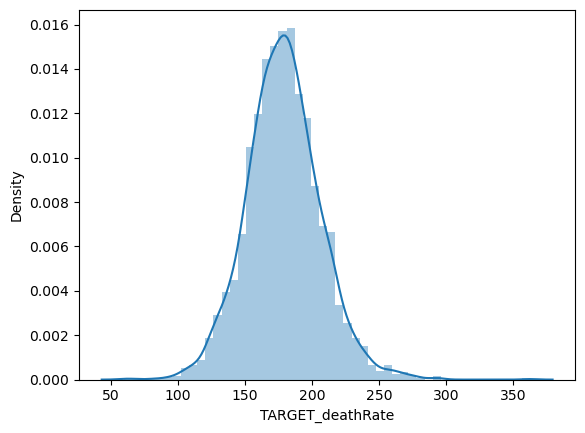

In [453]:
# mean
print(data['TARGET_deathRate'].mean())

# median
print(data['TARGET_deathRate'].median())

# mode
print(data['TARGET_deathRate'].mode())

# maximum 
print(data['TARGET_deathRate'].max())

# minimum 
print(data['TARGET_deathRate'].min())

# skewness 
print(data['TARGET_deathRate'].skew())

# distribution of the data
sns.distplot(data['TARGET_deathRate'])

In [454]:
data['incidenceRate']

0       489.800000
1       411.600000
2       349.700000
3       430.400000
4       350.100000
           ...    
3042    453.549422
3043    453.549422
3044    453.549422
3045    453.549422
3046    453.549422
Name: incidenceRate, Length: 3047, dtype: float64

In [455]:
data['incidenceRate'].value_counts()

453.549422    206
430.400000     10
444.500000      8
475.700000      7
475.200000      6
             ... 
318.500000      1
496.200000      1
497.300000      1
507.100000      1
453.200000      1
Name: incidenceRate, Length: 1506, dtype: int64

448.2685858065606
453.5494221
0    453.549422
Name: incidenceRate, dtype: float64
1206.9
201.3
0.7719347387973914


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incidenceRate', ylabel='Density'>

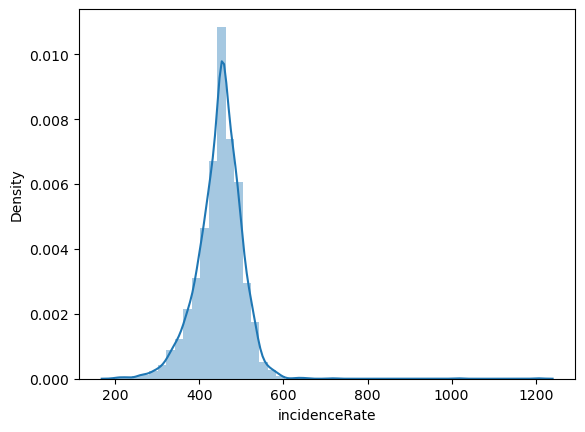

In [456]:
# mean
print(data['incidenceRate'].mean())

# median
print(data['incidenceRate'].median())

# mode
print(data['incidenceRate'].mode())

# maximum 
print(data['incidenceRate'].max())

# minimum 
print(data['incidenceRate'].min())

# skewness 
print(data['incidenceRate'].skew())

# distribution of the data
sns.distplot(data['incidenceRate'])

In [457]:
# treatment of outlier in incidenceRate column using z score
upper_limit = data['incidenceRate'].mean() + 3*data['incidenceRate'].std()
lower_limit = data['incidenceRate'].mean() - 3*data['incidenceRate'].std()

data['incidenceRate'] = np.where(
    data['incidenceRate']>upper_limit,
    upper_limit,
    np.where(
        data['incidenceRate']<lower_limit,
        lower_limit,
        data['incidenceRate']
    )
)

# skewness 
print(data['incidenceRate'].skew())

-0.44712701302951946


In [458]:
data['medIncome']

0       61898
1       48127
2       49348
3       44243
4       49955
        ...  
3042    46961
3043    48609
3044    51144
3045    50745
3046    41193
Name: medIncome, Length: 3047, dtype: int64

In [459]:
# value counts of medIncome
data['medIncome'].value_counts()

51175    3
34116    3
48368    3
36627    3
42582    3
        ..
39922    1
66034    1
83788    1
61775    1
41193    1
Name: medIncome, Length: 2920, dtype: int64

47063.28191663932
45207.0
0    34116
1    36627
2    42582
3    48368
4    51175
Name: medIncome, dtype: int64
125635
22640
1.408070730129756


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medIncome', ylabel='Density'>

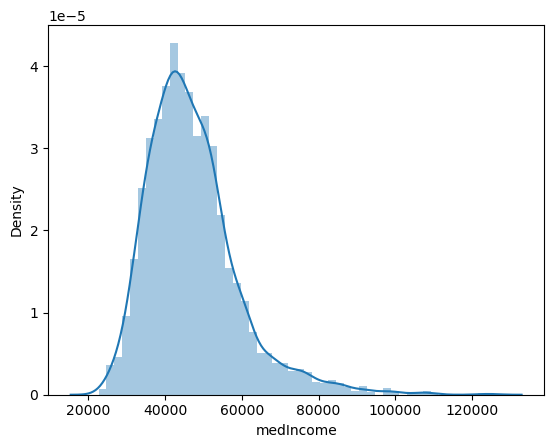

In [460]:
# mean
print(data['medIncome'].mean())

# median
print(data['medIncome'].median())

# mode
print(data['medIncome'].mode())

# maximum 
print(data['medIncome'].max())

# minimum 
print(data['medIncome'].min())

# skewness of the data['medIncome']
print(data['medIncome'].skew())

# distribution of the data
sns.distplot(data['medIncome'])

In [461]:
# log transformation of the data['medIncome']
data['medIncome'] = np.log(data['medIncome'])

# skewness of the data['medIncome'] after log transformation
print(data['medIncome'].skew())

0.4184849321249866


In [462]:
data['popEst2015']

0       260131
1        43269
2        21026
3        75882
4        10321
         ...  
3042      6343
3043     37118
3044     34536
3045     25609
3046     37030
Name: popEst2015, Length: 3047, dtype: int64

In [463]:
data['popEst2015'].value_counts()

17403      3
10483      2
25788      2
59660      2
12841      2
          ..
82005      1
3299521    1
864816     1
726106     1
37030      1
Name: popEst2015, Length: 2999, dtype: int64

102637.37052838858
26643.0
0    17403
Name: popEst2015, dtype: int64
10170292
827
14.289926352518503


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popEst2015', ylabel='Density'>

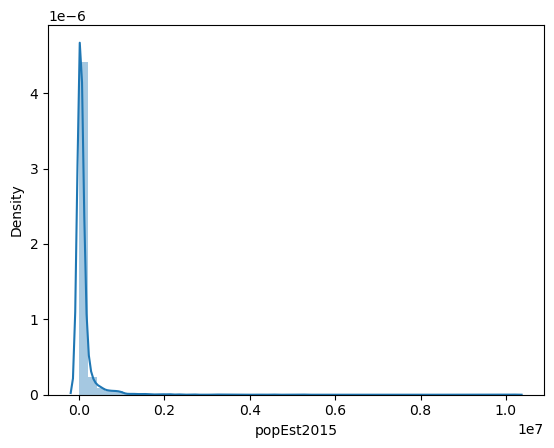

In [464]:
# mean
print(data['popEst2015'].mean())

# median
print(data['popEst2015'].median())

# mode
print(data['popEst2015'].mode())

# maximum 
print(data['popEst2015'].max())

# minimum 
print(data['popEst2015'].min())

# skewness 
print(data['popEst2015'].skew())

# distribution of the data
sns.distplot(data['popEst2015'])

In [465]:
# log transformation of the data['popEst2015']
data['popEst2015'] = np.log(data['popEst2015'])

# skewness of the data['popEst2015'] after log transformation
print(data['popEst2015'].skew())

0.49988172828815336


In [466]:
data['povertyPercent']

0       11.2
1       18.6
2       14.6
3       17.1
4       12.5
        ... 
3042    12.4
3043    18.8
3044    15.0
3045    13.3
3046    13.9
Name: povertyPercent, Length: 3047, dtype: float64

In [467]:
data['povertyPercent'].value_counts()

13.9    31
10.7    30
14.7    30
17.5    29
12.9    29
        ..
3.7      1
40.5     1
4.0      1
35.2     1
5.1      1
Name: povertyPercent, Length: 333, dtype: int64

16.878175254348548
15.9
0    13.9
Name: povertyPercent, dtype: float64
47.4
3.2
0.930712509461498


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='povertyPercent', ylabel='Density'>

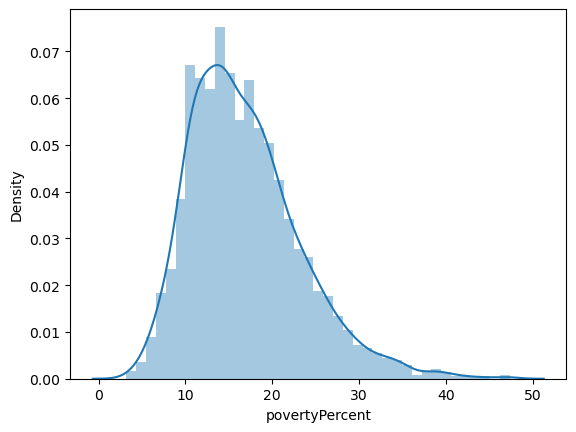

In [468]:
# mean
print(data['povertyPercent'].mean())

# median
print(data['povertyPercent'].median())

# mode
print(data['povertyPercent'].mode())

# maximum 
print(data['povertyPercent'].max())

# minimum 
print(data['povertyPercent'].min())

# skewness 
print(data['povertyPercent'].skew())

# distribution of the data
sns.distplot(data['povertyPercent'])

In [469]:
# treatment of outlier  using z score
upper_limit = data['povertyPercent'].mean() + 2.3*data['povertyPercent'].std()
lower_limit = data['povertyPercent'].mean() - 2.3*data['povertyPercent'].std()

data['povertyPercent'] = np.where(
    data['povertyPercent']>upper_limit,
    upper_limit,
    np.where(
        data['povertyPercent']<lower_limit,
        lower_limit,
        data['povertyPercent']
    )
)

# skewness 
print(data['povertyPercent'].skew())

0.5725678128062051


In [470]:
data['studyPerCap']

0        499.748204
1         23.111234
2         47.560164
3        342.637253
4          0.000000
           ...     
3042       0.000000
3043     377.175494
3044    1968.959926
3045       0.000000
3046       0.000000
Name: studyPerCap, Length: 3047, dtype: float64

In [471]:
data['studyPerCap'].value_counts()

0.000000       1931
499.748204        1
98.125797         1
80.706743         1
85.480175         1
               ... 
109.678835        1
421.099376        1
79.864003         1
29.800153         1
1968.959926       1
Name: studyPerCap, Length: 1117, dtype: int64

In [472]:
# mean
print(data['studyPerCap'].mean())

# median
print(data['studyPerCap'].median())

# mode
print(data['studyPerCap'].mode())

# maximum
print(data['studyPerCap'].max())

# minimum
print(data['studyPerCap'].min())

# skewness
print(data['studyPerCap'].skew())

155.399415317608
0.0
0    0.0
Name: studyPerCap, dtype: float64
9762.308998
0.0
8.713689816797178


In [473]:
# replacing the value >0 as 1 and <=0 as 0
data['studyPerCap'] = np.where(data['studyPerCap']>0,1,0)

# value counts of studyPerCap
data['studyPerCap'].value_counts()

0    1931
1    1116
Name: studyPerCap, dtype: int64

In [474]:
data.shape

(3047, 32)

In [475]:
data['MedianAge']

0       39.3
1       33.0
2       45.0
3       42.8
4       48.3
        ... 
3042    44.2
3043    30.4
3044    30.9
3045    39.0
3046    26.2
Name: MedianAge, Length: 3047, dtype: float64

In [476]:
data['MedianAge'].value_counts()

41.0     42
42.2     36
38.8     35
40.1     34
40.7     34
         ..
29.2      1
412.8     1
27.4      1
33.1      1
26.2      1
Name: MedianAge, Length: 325, dtype: int64

45.272333442730634
41.0
0    41.0
Name: MedianAge, dtype: float64
624.0
22.3
9.989944180239183


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianAge', ylabel='Density'>

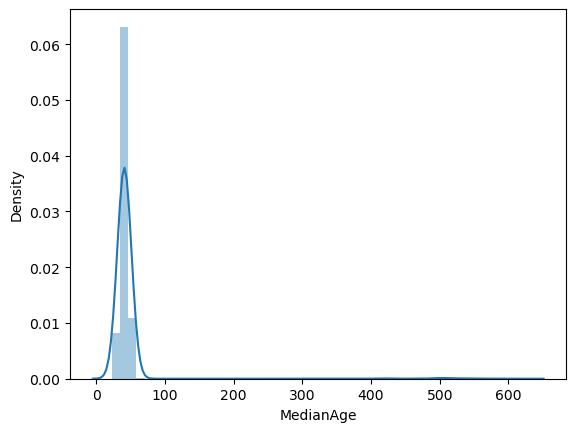

In [477]:
# mean
print(data['MedianAge'].mean())

# median
print(data['MedianAge'].median())

# mode
print(data['MedianAge'].mode())

# maximum 
print(data['MedianAge'].max())

# minimum 
print(data['MedianAge'].min())

# skewness 
print(data['MedianAge'].skew())

# distribution of the data
sns.distplot(data['MedianAge'])

In [478]:
upper_limit = data['MedianAge'].mean() + 2*data['MedianAge'].std()
lower_limit = data['MedianAge'].mean() - 2*data['MedianAge'].std()

data['MedianAge'] = np.where(
    data['MedianAge']>upper_limit,
    upper_limit,
    np.where(
        data['MedianAge']<lower_limit,
        lower_limit,
        data['MedianAge']
    )
)
# skewness of the data['MedianAge']
print(data['MedianAge'].skew())


6.609124888451391


In [479]:
upper_limit = data['MedianAge'].mean() + 1*data['MedianAge'].std()
lower_limit = data['MedianAge'].mean() - 1*data['MedianAge'].std()

data['MedianAge'] = np.where(
    data['MedianAge']>upper_limit,
    upper_limit,
    np.where(
        data['MedianAge']<lower_limit,
        lower_limit,
        data['MedianAge']
    )
)
# skewness of the data['MedianAge']
print(data['MedianAge'].skew())

0.13171375022572257


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianAge', ylabel='Density'>

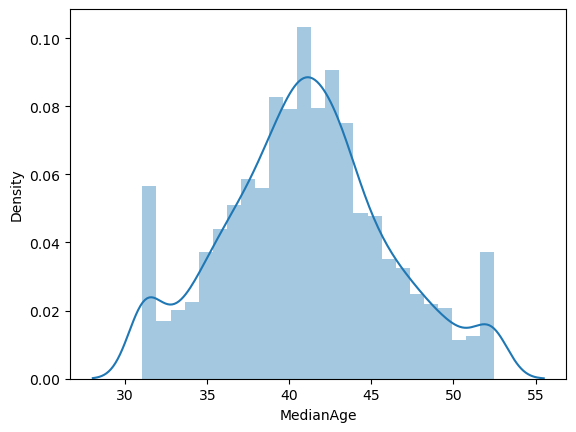

In [480]:
# distribution of the data
sns.distplot(data['MedianAge'])

In [481]:
data['MedianAgeMale']

0       36.9
1       32.2
2       44.0
3       42.2
4       47.8
        ... 
3042    41.1
3043    29.3
3044    30.5
3045    36.9
3046    25.5
Name: MedianAgeMale, Length: 3047, dtype: float64

In [482]:
data['MedianAgeMale'].value_counts()

40.3    35
40.1    34
39.2    33
42.1    32
40.4    32
        ..
24.0     1
50.9     1
56.2     1
64.7     1
24.8     1
Name: MedianAgeMale, Length: 298, dtype: int64

39.570725303577305
39.6
0    40.3
Name: MedianAgeMale, dtype: float64
64.7
22.4
0.13204093260050728


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianAgeMale', ylabel='Density'>

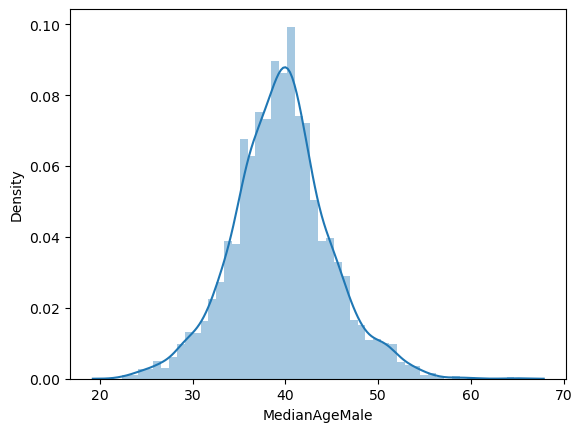

In [483]:
# mean
print(data['MedianAgeMale'].mean())

# median
print(data['MedianAgeMale'].median())

# mode
print(data['MedianAgeMale'].mode())

# maximum 
print(data['MedianAgeMale'].max())

# minimum 
print(data['MedianAgeMale'].min())

# skewness 
print(data['MedianAgeMale'].skew())

# distribution of the data
sns.distplot(data['MedianAgeMale'])

In [484]:
data['MedianAgeFemale']

0       41.7
1       33.7
2       45.8
3       43.4
4       48.9
        ... 
3042    48.8
3043    31.4
3044    31.2
3045    40.5
3046    27.0
Name: MedianAgeFemale, Length: 3047, dtype: float64

In [485]:
data['MedianAgeFemale'].value_counts()

42.9    44
42.2    35
41.1    34
44.5    34
42.7    32
        ..
26.0     1
25.3     1
58.0     1
56.1     1
27.7     1
Name: MedianAgeFemale, Length: 296, dtype: int64

42.145323268789
42.4
0    42.9
Name: MedianAgeFemale, dtype: float64
65.7
22.3
-0.20838386540505244


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianAgeFemale', ylabel='Density'>

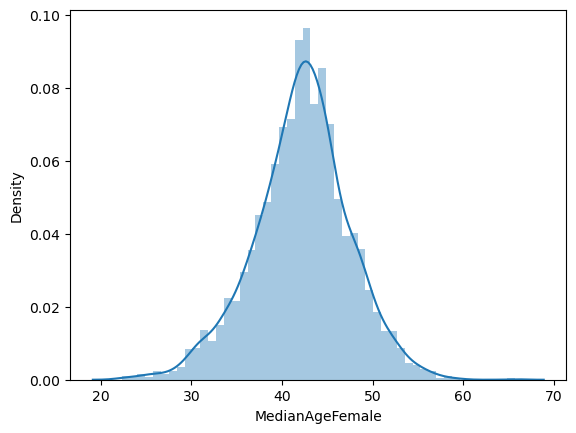

In [486]:
# mean of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].mean())

# median of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].median())

# mode of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].mode())

# max of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].max())

# min of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].min())

# skewness of the data['MedianAgeFemale']
print(data['MedianAgeFemale'].skew())

# distribution of the data['MedianAgeFemale']
sns.distplot(data['MedianAgeFemale'])


In [487]:
data['AvgHouseholdSize']

0       2.54
1       2.34
2       2.62
3       2.52
4       2.34
        ... 
3042    2.08
3043    2.90
3044    3.04
3045    2.56
3046    2.83
Name: AvgHouseholdSize, Length: 3047, dtype: float64

In [488]:
data['AvgHouseholdSize'].value_counts()

2.5200    75
2.4800    70
2.5500    68
2.4400    67
2.4300    66
          ..
0.0271     1
0.0253     1
3.2300     1
0.0245     1
1.9100     1
Name: AvgHouseholdSize, Length: 199, dtype: int64

2.4796617984903166
2.5
0    2.52
Name: AvgHouseholdSize, dtype: float64
3.97
0.0221
-3.380987850618506


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgHouseholdSize', ylabel='Density'>

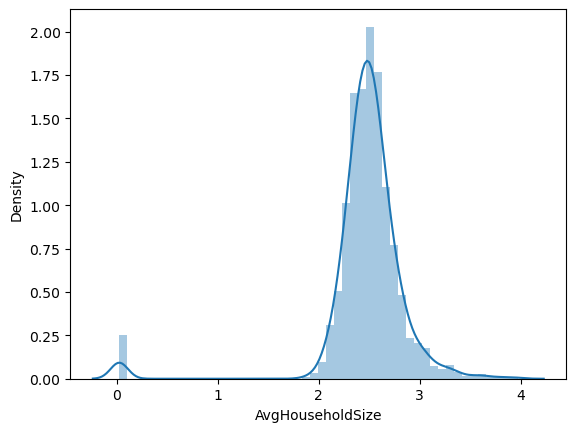

In [489]:
# mean of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].mean())

# median of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].median())

# mode of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].mode())

# max of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].max())

# min of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].min())

# skewness of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].skew())

# distribution of the data['AvgHouseholdSize']
sns.distplot(data['AvgHouseholdSize'])

In [490]:
upper_limit = data['AvgHouseholdSize'].mean() + 2.7*data['AvgHouseholdSize'].std()
lower_limit = data['AvgHouseholdSize'].mean() - 2.7*data['AvgHouseholdSize'].std()

data['AvgHouseholdSize'] = np.where(
    data['AvgHouseholdSize']>upper_limit,
    upper_limit,
    np.where(
        data['AvgHouseholdSize']<lower_limit,
        lower_limit,
        data['AvgHouseholdSize']
    )
)

# skewness of the data['AvgHouseholdSize']
print(data['AvgHouseholdSize'].skew())

-0.4596648976883633


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgHouseholdSize', ylabel='Density'>

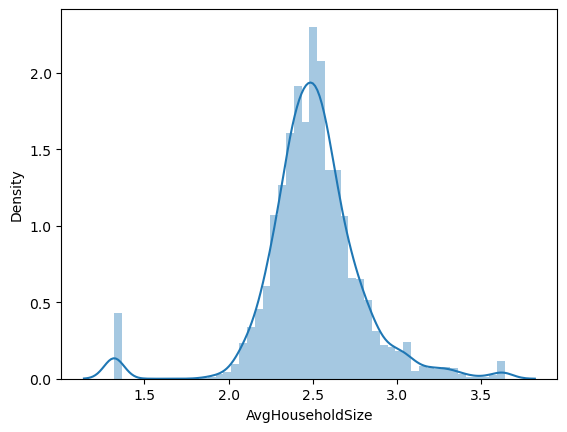

In [491]:
# distribution of the data['AvgHouseholdSize']
sns.distplot(data['AvgHouseholdSize'])

In [492]:
data['PercentMarried']

0       52.5
1       44.5
2       54.2
3       52.7
4       57.8
        ... 
3042    51.0
3043    52.6
3044    54.8
3045    58.8
3046    59.5
Name: PercentMarried, Length: 3047, dtype: float64

In [493]:
data['PercentMarried'].value_counts()

52.2    35
52.7    29
51.1    29
55.0    28
54.4    26
        ..
29.5     1
32.8     1
34.1     1
63.7     1
66.2     1
Name: PercentMarried, Length: 362, dtype: int64

51.77367902855284
52.4
0    52.2
Name: PercentMarried, dtype: float64
72.5
23.1
-0.6534872117669566


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PercentMarried', ylabel='Density'>

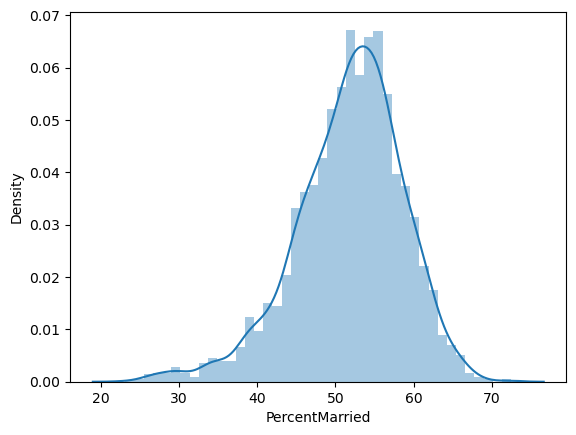

In [494]:
# mean of the data['PercentMarried']
print(data['PercentMarried'].mean())

# median of the data['PercentMarried']
print(data['PercentMarried'].median())

# mode of the data['PercentMarried']
print(data['PercentMarried'].mode())

# max of the data['PercentMarried']
print(data['PercentMarried'].max())

# min of the data['PercentMarried']
print(data['PercentMarried'].min())

# skewness of the data['PercentMarried']
print(data['PercentMarried'].skew())

# distribution of the data['PercentMarried']
sns.distplot(data['PercentMarried'])

In [495]:
upper_limit = data['PercentMarried'].mean() + 2.8*data['PercentMarried'].std()
lower_limit = data['PercentMarried'].mean() - 2.8*data['PercentMarried'].std()

data['PercentMarried'] = np.where(
    data['PercentMarried']>upper_limit,
    upper_limit,
    np.where(
        data['PercentMarried']<lower_limit,
        lower_limit,
        data['PercentMarried']
    )
)

# skewness of the data['PercentMarried']
print(data['PercentMarried'].skew())

-0.4970201193912269


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PercentMarried', ylabel='Density'>

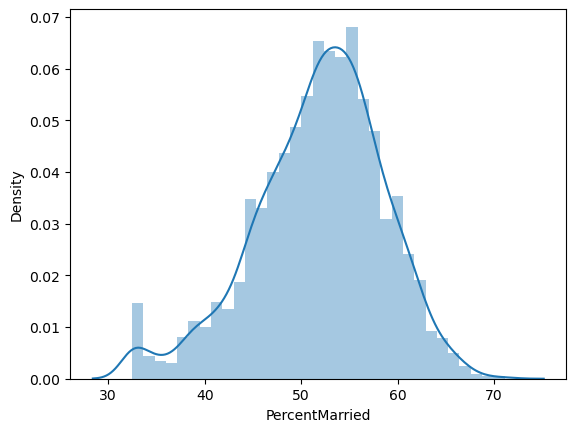

In [496]:
# distribution of the data['PercentMarried']
sns.distplot(data['PercentMarried'])

In [497]:
data['PctNoHS18_24']

0       11.5
1        6.1
2       24.0
3       20.2
4       14.9
        ... 
3042    20.9
3043    26.7
3044    19.7
3045    10.9
3046     8.0
Name: PctNoHS18_24, Length: 3047, dtype: float64

In [498]:
data['PctNoHS18_24'].value_counts()

15.7    25
14.7    24
14.8    24
16.7    23
12.8    23
        ..
42.1     1
36.6     1
46.0     1
38.8     1
2.8      1
Name: PctNoHS18_24, Length: 405, dtype: int64

18.22445027896296
17.1
0    15.7
Name: PctNoHS18_24, dtype: float64
64.1
0.0
0.9733451898743336


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctNoHS18_24', ylabel='Density'>

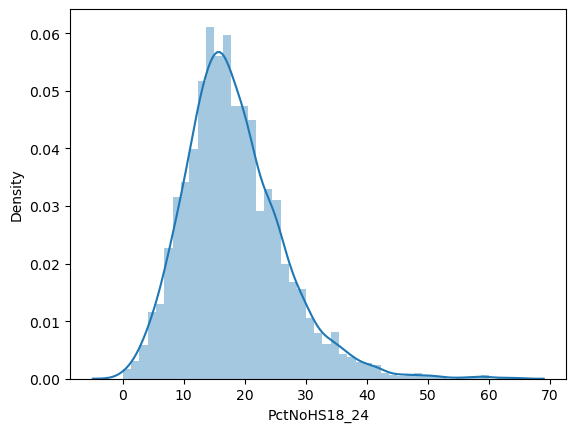

In [499]:
# mean of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].mean())

# median of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].median())

# mode of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].mode())

# max of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].max())

# min of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].min())

# skewness of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].skew())

# distribution of the data['PctNoHS18_24']
sns.distplot(data['PctNoHS18_24'])

In [500]:
upper_limit = data['PctNoHS18_24'].mean() + 2.3*data['PctNoHS18_24'].std()
lower_limit = data['PctNoHS18_24'].mean() - 2.3*data['PctNoHS18_24'].std()

data['PctNoHS18_24'] = np.where(
    data['PctNoHS18_24']>upper_limit,
    upper_limit,
    np.where(
        data['PctNoHS18_24']<lower_limit,
        lower_limit,
        data['PctNoHS18_24']
    )
)

# skewness of the data['PctNoHS18_24']
print(data['PctNoHS18_24'].skew())

0.47267901424005987


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctNoHS18_24', ylabel='Density'>

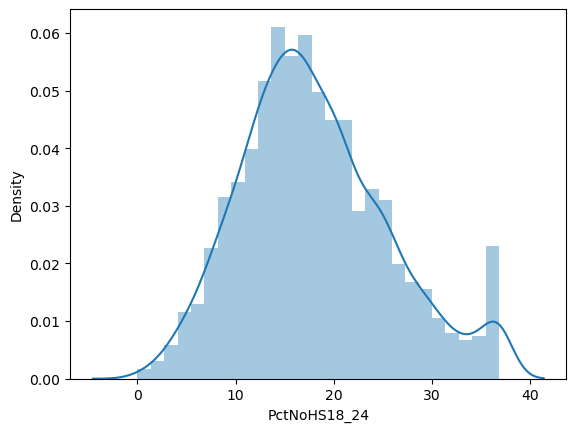

In [501]:
# distribution of the data['PctNoHS18_24']
sns.distplot(data['PctNoHS18_24'])

In [502]:
data['PctHS18_24']

0       39.5
1       22.4
2       36.6
3       41.2
4       43.0
        ... 
3042    27.9
3043    33.9
3044    44.5
3045    37.2
3046    43.3
Name: PctHS18_24, Length: 3047, dtype: float64

In [503]:
data['PctHS18_24'].value_counts()

33.7    24
34.4    22
33.2    22
41.3    21
29.9    21
        ..
19.5     1
61.1     1
12.8     1
55.8     1
59.7     1
Name: PctHS18_24, Length: 469, dtype: int64

35.00206760748285
34.7
0    33.7
Name: PctHS18_24, dtype: float64
72.5
0.0
0.17920909672420798


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctHS18_24', ylabel='Density'>

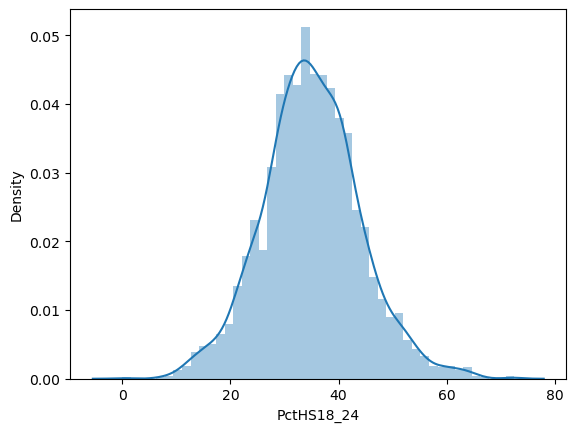

In [504]:
# mean of the data['PctHS18_24']
print(data['PctHS18_24'].mean())

# median of the data['PctHS18_24']
print(data['PctHS18_24'].median())

# mode of the data['PctHS18_24']
print(data['PctHS18_24'].mode())

# max of the data['PctHS18_24']
print(data['PctHS18_24'].max())

# min of the data['PctHS18_24']
print(data['PctHS18_24'].min())

# skewness of the data['PctHS18_24']
print(data['PctHS18_24'].skew())

# distribution of the data['PctHS18_24']
sns.distplot(data['PctHS18_24'])

In [505]:
data['PctBachDeg18_24']

0       6.9
1       7.5
2       9.5
3       2.5
4       2.0
       ... 
3042    8.4
3043    3.8
3044    2.5
3045    4.1
3046    4.8
Name: PctBachDeg18_24, Length: 3047, dtype: float64

In [506]:
data['PctBachDeg18_24'].value_counts()

0.0     118
4.7      51
4.8      45
2.7      41
1.8      41
       ... 
16.5      1
33.3      1
17.6      1
22.5      1
18.1      1
Name: PctBachDeg18_24, Length: 219, dtype: int64

6.158286839514264
5.4
0    0.0
Name: PctBachDeg18_24, dtype: float64
51.8
0.0
1.9562007174027167


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBachDeg18_24', ylabel='Density'>

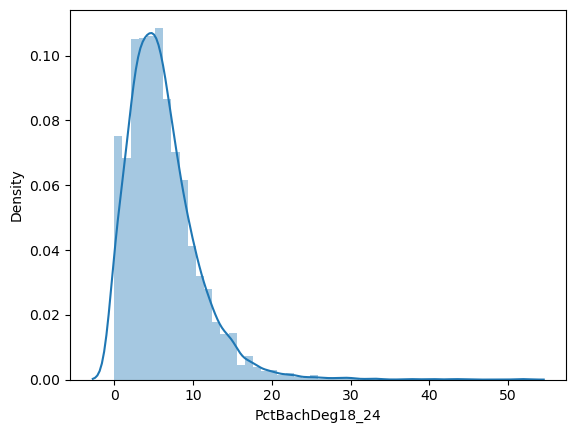

In [507]:
# mean of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].mean())

# median of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].median())

# mode of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].mode())

# max of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].max())

# min of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].min())

# skewness of the data['PctBachDeg18_24']
print(data['PctBachDeg18_24'].skew())

# distribution of the data['PctBachDeg18_24']
sns.distplot(data['PctBachDeg18_24'])

In [508]:
upper_limit = data['PctBachDeg18_24'].mean() + 2*data['PctBachDeg18_24'].std()
lower_limit = data['PctBachDeg18_24'].mean() - 2*data['PctBachDeg18_24'].std()

data['PctBachDeg18_24'] = np.where(
    data['PctBachDeg18_24']>upper_limit,
    upper_limit,
    np.where(
        data['PctBachDeg18_24']<lower_limit,
        lower_limit,
        data['PctBachDeg18_24']
    )
)

# skewness of the data['PctBachDeg18_24']

print(data['PctBachDeg18_24'].skew())

0.6572441529020916


In [509]:
upper_limit = data['PctBachDeg18_24'].mean() + 2*data['PctBachDeg18_24'].std()
lower_limit = data['PctBachDeg18_24'].mean() - 2*data['PctBachDeg18_24'].std()

data['PctBachDeg18_24'] = np.where(
    data['PctBachDeg18_24']>upper_limit,
    upper_limit,
    np.where(
        data['PctBachDeg18_24']<lower_limit,
        lower_limit,
        data['PctBachDeg18_24']
    )
)

# skewness of the data['PctBachDeg18_24']

print(data['PctBachDeg18_24'].skew())

0.5016247070478829


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBachDeg18_24', ylabel='Density'>

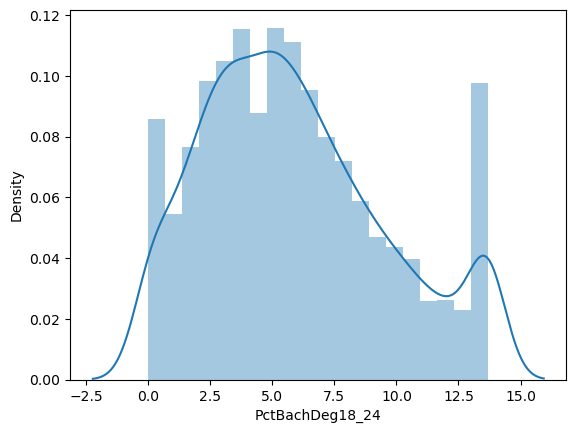

In [510]:
# distribution of the data['PctBachDeg18_24']

sns.distplot(data['PctBachDeg18_24'])

In [511]:
data['PctHS25_Over']

0       23.2
1       26.0
2       29.0
3       31.6
4       33.4
        ... 
3042    32.2
3043    23.1
3044    23.0
3045    36.1
3046    29.8
Name: PctHS25_Over, Length: 3047, dtype: float64

In [512]:
data['PctHS25_Over'].value_counts()

35.6    28
35.5    25
36.4    24
33.4    24
31.8    24
        ..
11.5     1
16.0     1
49.6     1
14.9     1
18.8     1
Name: PctHS25_Over, Length: 361, dtype: int64

34.80466032162796
35.3
0    35.6
Name: PctHS25_Over, dtype: float64
54.8
7.5
-0.3336349447968398


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctHS25_Over', ylabel='Density'>

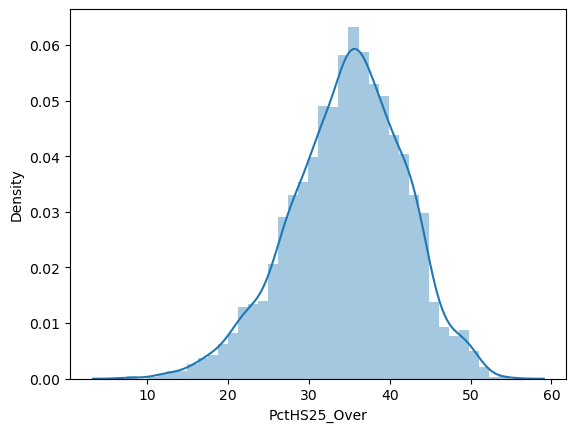

In [513]:
# mean of the data['PctHS25_Over']
print(data['PctHS25_Over'].mean())

# median of the data['PctHS25_Over']
print(data['PctHS25_Over'].median())

# mode of the data['PctHS25_Over']
print(data['PctHS25_Over'].mode())

# max of the data['PctHS25_Over']
print(data['PctHS25_Over'].max())

# min of the data['PctHS25_Over']
print(data['PctHS25_Over'].min())

# skewness of the data['PctHS25_Over']
print(data['PctHS25_Over'].skew())

# distribution of the data['PctHS25_Over']
sns.distplot(data['PctHS25_Over'])

In [514]:
data['PctBachDeg25_Over']

0       19.6
1       22.7
2       16.0
3        9.3
4       15.0
        ... 
3042    15.2
3043    12.4
3044    12.8
3045    14.4
3046    13.7
Name: PctBachDeg25_Over, Length: 3047, dtype: float64

In [515]:
data['PctBachDeg25_Over'].value_counts()

9.0     37
10.0    35
11.5    35
10.7    35
9.8     33
        ..
26.6     1
24.9     1
26.8     1
33.6     1
25.5     1
Name: PctBachDeg25_Over, Length: 281, dtype: int64

13.282015096816504
12.3
0    9.0
Name: PctBachDeg25_Over, dtype: float64
42.2
2.5
1.094837086249807


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='Density'>

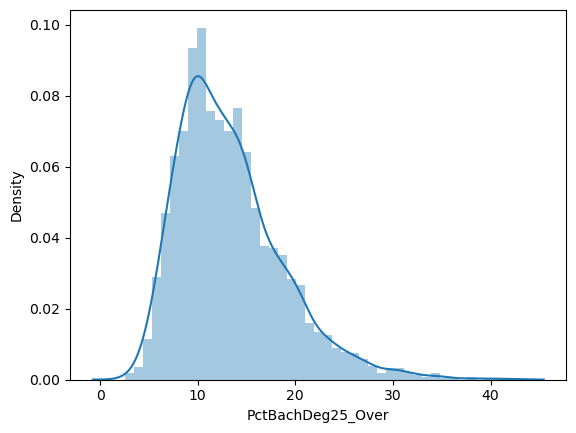

In [516]:
# mean of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].mean())

# median of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].median())

# mode of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].mode())

# max of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].max())

# min of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].min())

# skewness of the data['PctBachDeg25_Over']
print(data['PctBachDeg25_Over'].skew())

# distribution of the data['PctBachDeg25_Over']
sns.distplot(data['PctBachDeg25_Over'])

In [517]:
upper_limit = data['PctBachDeg25_Over'].mean() + 2*data['PctBachDeg25_Over'].std()
lower_limit = data['PctBachDeg25_Over'].mean() - 2*data['PctBachDeg25_Over'].std()

data['PctBachDeg25_Over'] = np.where(
    data['PctBachDeg25_Over']>upper_limit,
    upper_limit,
    np.where(
        data['PctBachDeg25_Over']<lower_limit,
        lower_limit,
        data['PctBachDeg25_Over']
    )
)

# skewness of the data['PctBachDeg18_24']

print(data['PctBachDeg25_Over'].skew())

0.5648271397569573


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='Density'>

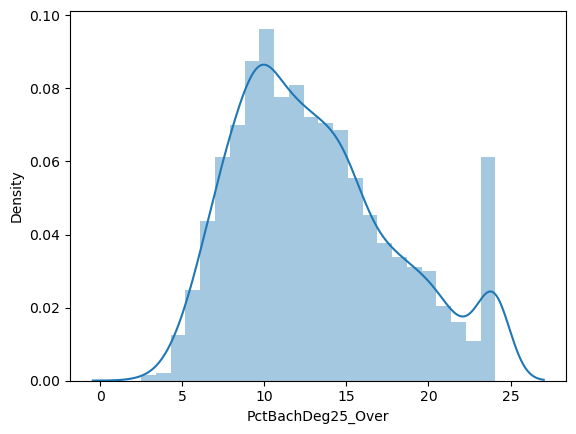

In [518]:
# distribution of the data['PctBachDeg25_Over']
sns.distplot(data['PctBachDeg25_Over'])

In [519]:
data['PctUnemployed16_Over']

0        8.0
1        7.8
2        7.0
3       12.1
4        4.8
        ... 
3042     4.3
3043     4.6
3044     6.4
3045     6.9
3046     9.2
Name: PctUnemployed16_Over, Length: 3047, dtype: float64

In [520]:
data['PctUnemployed16_Over'].value_counts()

6.9     47
6.8     47
8.3     46
7.2     46
9.0     45
        ..
26.8     1
27.0     1
19.4     1
17.7     1
25.4     1
Name: PctUnemployed16_Over, Length: 195, dtype: int64

7.852412208729909
7.6
0    6.8
1    6.9
Name: PctUnemployed16_Over, dtype: float64
29.4
0.4
0.8910610916775311


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctUnemployed16_Over', ylabel='Density'>

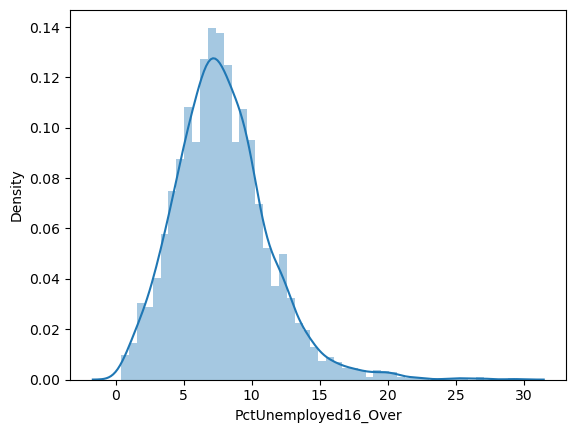

In [521]:
# mean of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].mean())

# median of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].median())

# mode of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].mode())

# max of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].max())

# min of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].min())

# skewness of the data['PctUnemployed16_Over']
print(data['PctUnemployed16_Over'].skew())

# distribution of the data['PctUnemployed16_Over']
sns.distplot(data['PctUnemployed16_Over'])

In [522]:
upper_limit = data['PctUnemployed16_Over'].mean() + 2.7*data['PctUnemployed16_Over'].std()
lower_limit = data['PctUnemployed16_Over'].mean() - 2.7*data['PctUnemployed16_Over'].std()

data['PctUnemployed16_Over'] = np.where(
    data['PctUnemployed16_Over']>upper_limit,
    upper_limit,
    np.where(
        data['PctUnemployed16_Over']<lower_limit,
        lower_limit,
        data['PctUnemployed16_Over']
    )
)

# skewness of the data['PctUnemployed16_Over']

print(data['PctUnemployed16_Over'].skew())


0.4753839438195292


In [523]:
data['PctPrivateCoverage']

0       75.1
1       70.2
2       63.7
3       58.4
4       61.6
        ... 
3042    78.3
3043    64.5
3044    62.0
3045    75.9
3046    76.1
Name: PctPrivateCoverage, Length: 3047, dtype: float64

In [524]:
data['PctPrivateCoverage'].value_counts()

65.3    20
68.1    20
69.1    20
65.2    17
66.2    17
        ..
86.9     1
40.6     1
33.8     1
87.2     1
86.7     1
Name: PctPrivateCoverage, Length: 498, dtype: int64

64.35493928454237
65.1
0    65.3
1    68.1
2    69.1
Name: PctPrivateCoverage, dtype: float64
92.3
22.3
-0.39353722276120706


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctPrivateCoverage', ylabel='Density'>

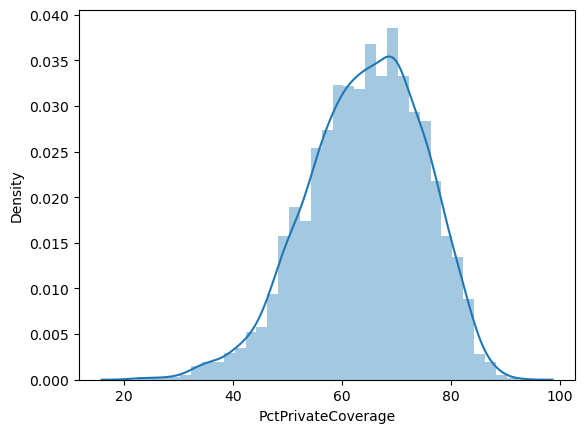

In [525]:
# mean of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].mean())

# median of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].median())

# mode of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].mode())

# max of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].max())

# min of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].min())

# skewness of the data['PctPrivateCoverage']
print(data['PctPrivateCoverage'].skew())

# distribution of the data['PctPrivateCoverage']
sns.distplot(data['PctPrivateCoverage'])

In [526]:
data['PctEmpPrivCoverage']

0       41.6
1       43.6
2       34.9
3       35.0
4       35.1
        ... 
3042    44.6
3043    48.6
3044    47.8
3045    49.6
3046    22.9
Name: PctEmpPrivCoverage, Length: 3047, dtype: float64

In [527]:
data['PctEmpPrivCoverage'].value_counts()

43.7    23
40.0    20
39.7    20
32.6    19
43.6    19
        ..
63.0     1
18.3     1
58.0     1
63.9     1
62.5     1
Name: PctEmpPrivCoverage, Length: 450, dtype: int64

41.196324253364
41.1
0    43.7
Name: PctEmpPrivCoverage, dtype: float64
70.7
13.5
0.0894157178206916


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctEmpPrivCoverage', ylabel='Density'>

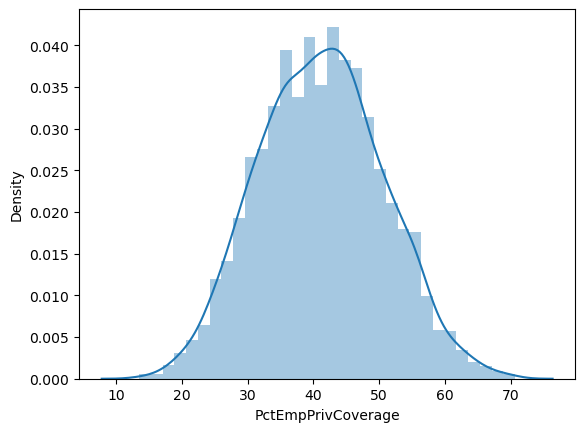

In [528]:
# mean of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].mean())

# median of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].median())

# mode of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].mode())

# max of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].max())

# min of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].min())

# skewness of the data['PctEmpPrivCoverage']
print(data['PctEmpPrivCoverage'].skew())

# distribution of the data['PctEmpPrivCoverage']
sns.distplot(data['PctEmpPrivCoverage'])

In [529]:
data['PctPublicCoverage']

0       32.9
1       31.1
2       42.1
3       45.3
4       44.0
        ... 
3042    31.7
3043    28.8
3044    26.6
3045    29.5
3046    25.1
Name: PctPublicCoverage, Length: 3047, dtype: float64

In [530]:
data['PctPublicCoverage'].value_counts 

<bound method IndexOpsMixin.value_counts of 0       32.9
1       31.1
2       42.1
3       45.3
4       44.0
        ... 
3042    31.7
3043    28.8
3044    26.6
3045    29.5
3046    25.1
Name: PctPublicCoverage, Length: 3047, dtype: float64>

36.25264194289469
36.3
0    35.3
Name: PctPublicCoverage, dtype: float64
65.1
11.2
-0.005435599855118203


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctPublicCoverage', ylabel='Density'>

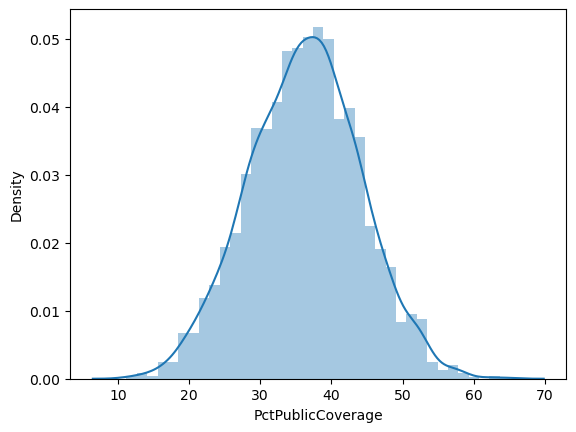

In [531]:
# mean of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].mean())

# median of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].median())

# mode of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].mode())

# max of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].max())

# min of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].min())

# skewness of the data['PctPublicCoverage']
print(data['PctPublicCoverage'].skew())

# distribution of the data['PctPublicCoverage']
sns.distplot(data['PctPublicCoverage'])

In [532]:
data['PctPublicCoverageAlone']

0       14.0
1       15.3
2       21.1
3       25.0
4       22.7
        ... 
3042    13.2
3043    17.7
3044    16.8
3045    14.0
3046    12.6
Name: PctPublicCoverageAlone, Length: 3047, dtype: float64

In [533]:
data['PctPublicCoverageAlone'].value_counts()

18.7    32
16.8    29
20.2    28
17.9    27
18.8    25
        ..
5.6      1
4.6      1
5.5      1
39.8     1
43.3     1
Name: PctPublicCoverageAlone, Length: 319, dtype: int64

19.24007220216613
18.8
0    18.7
Name: PctPublicCoverageAlone, dtype: float64
46.6
2.6
0.4709493463137666


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='Density'>

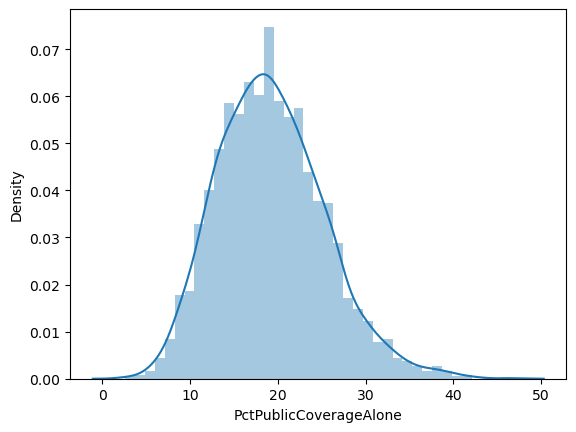

In [534]:
# mean of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].mean())

# median of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].median())

# mode of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].mode())

# max of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].max())

# min of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].min())

# skewness of the data['PctPublicCoverageAlone']
print(data['PctPublicCoverageAlone'].skew())

# distribution of the data['PctPublicCoverageAlone']
sns.distplot(data['PctPublicCoverageAlone'])

In [535]:
data['PctWhite']

0       81.780529
1       89.228509
2       90.922190
3       91.744686
4       94.104024
          ...    
3042    90.280811
3043    75.706245
3044    87.961629
3045    92.905681
3046    70.098132
Name: PctWhite, Length: 3047, dtype: float64

In [536]:
data['PctWhite'].value_counts()

97.087379    2
94.674556    2
97.212544    2
81.780529    1
97.854954    1
            ..
84.531855    1
62.154061    1
95.693201    1
70.851690    1
70.098132    1
Name: PctWhite, Length: 3044, dtype: int64

83.64528623489977
90.05977419
0    94.674556
1    97.087379
2    97.212544
Name: PctWhite, dtype: float64
100.0
10.1991551
-1.6809042103678058


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctWhite', ylabel='Density'>

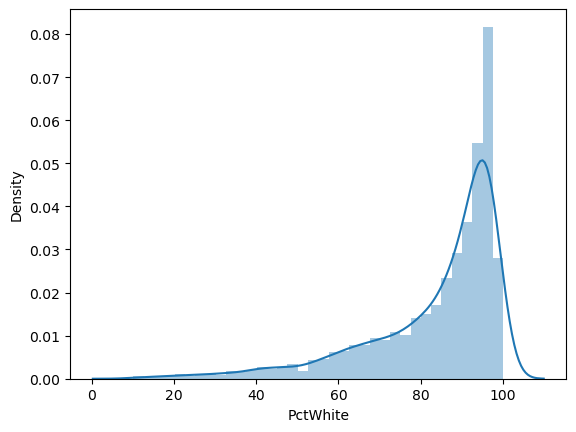

In [537]:
# mean of the data['PctWhite']
print(data['PctWhite'].mean())

# median of the data['PctWhite']
print(data['PctWhite'].median())

# mode of the data['PctWhite']
print(data['PctWhite'].mode())

# max of the data['PctWhite']
print(data['PctWhite'].max())

# min of the data['PctWhite']
print(data['PctWhite'].min())

# skewness of the data['PctWhite']
print(data['PctWhite'].skew())

# distribution of the data['PctWhite']
sns.distplot(data['PctWhite'])

In [538]:
upper_limit = data['PctWhite'].mean() + 1*data['PctWhite'].std()
lower_limit = data['PctWhite'].mean() - 1*data['PctWhite'].std()

data['PctWhite'] = np.where(
    data['PctWhite']>upper_limit,
    upper_limit,
    np.where(
        data['PctWhite']<lower_limit,
        lower_limit,
        data['PctWhite']
    )
)

# skewwness
print(data['PctWhite'].skew())

-0.6630141215250516


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctWhite', ylabel='Density'>

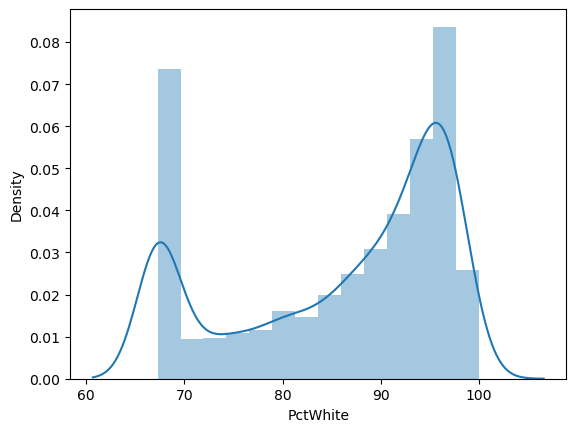

In [539]:
# distribution of the data['PctWhite']
sns.distplot(data['PctWhite'])

In [540]:
upper_limit = data['PctWhite'].mean() + 1*data['PctWhite'].std()
lower_limit = data['PctWhite'].mean() - 1*data['PctWhite'].std()

data['PctWhite'] = np.where(
    data['PctWhite']>upper_limit,
    upper_limit,
    np.where(
        data['PctWhite']<lower_limit,
        lower_limit,
        data['PctWhite']
    )
)

# skewwness
print(data['PctWhite'].skew())

-0.3922595626581166


In [541]:
data['PctBlack']

0        2.594728
1        0.969102
2        0.739673
3        0.782626
4        0.270192
          ...    
3042     3.837754
3043     2.326771
3044     2.313188
3045     1.176562
3046    16.590100
Name: PctBlack, Length: 3047, dtype: float64

In [542]:
data['PctBlack'].value_counts()

0.000000     72
0.363636      2
0.378788      2
0.185071      2
0.329852      2
             ..
1.190638      1
5.065812      1
5.569346      1
7.093743      1
16.590100     1
Name: PctBlack, Length: 2972, dtype: int64

9.10797761456938
2.247576296
0    0.0
Name: PctBlack, dtype: float64
85.94779858
0.0
2.258068427875905


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBlack', ylabel='Density'>

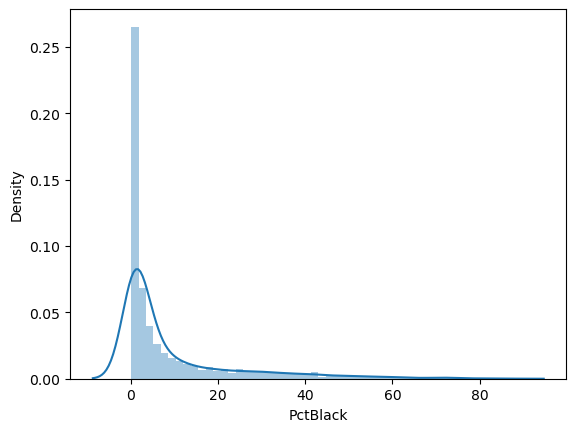

In [543]:
# mean of the data['PctBlack']
print(data['PctBlack'].mean())

# median of the data['PctBlack']
print(data['PctBlack'].median())

# mode of the data['PctBlack']
print(data['PctBlack'].mode())

# max of the data['PctBlack']
print(data['PctBlack'].max())

# min of the data['PctBlack']
print(data['PctBlack'].min())

# skewness of the data['PctBlack']
print(data['PctBlack'].skew())

# distribution of the data['PctBlack']
sns.distplot(data['PctBlack'])

In [544]:
upper_limit = data['PctBlack'].mean() + 1*data['PctBlack'].std()
lower_limit = data['PctBlack'].mean() - 1*data['PctBlack'].std()

data['PctBlack'] = np.where(
    data['PctBlack']>upper_limit,
    upper_limit,
    np.where(
        data['PctBlack']<lower_limit,
        lower_limit,
        data['PctBlack']
    )
)

# skewwness
print(data['PctBlack'].skew())

1.1566587239476396


In [545]:
upper_limit = data['PctBlack'].mean() + 1*data['PctBlack'].std()
lower_limit = data['PctBlack'].mean() - 1*data['PctBlack'].std()

data['PctBlack'] = np.where(
    data['PctBlack']>upper_limit,
    upper_limit,
    np.where(
        data['PctBlack']<lower_limit,
        lower_limit,
        data['PctBlack']
    )
)

# skewwness
print(data['PctBlack'].skew())

0.8158242360233282


In [546]:
upper_limit = data['PctBlack'].mean() + 1*data['PctBlack'].std()
lower_limit = data['PctBlack'].mean() - 1*data['PctBlack'].std()

data['PctBlack'] = np.where(
    data['PctBlack']>upper_limit,
    upper_limit,
    np.where(
        data['PctBlack']<lower_limit,
        lower_limit,
        data['PctBlack']
    )
)

# skewwness
print(data['PctBlack'].skew())

0.6021004961610673


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctBlack', ylabel='Density'>

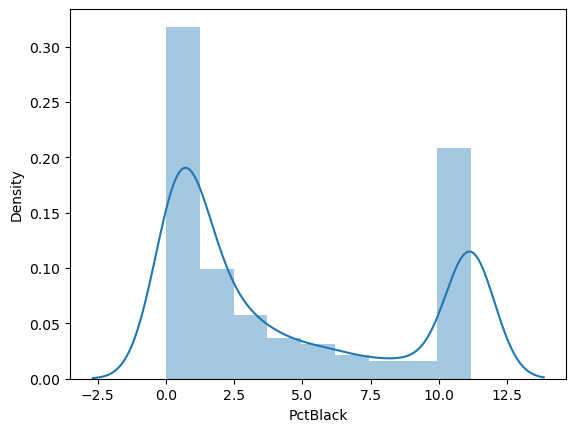

In [547]:
# distribution of the data['PctBlack']
sns.distplot(data['PctBlack'])

In [548]:
upper_limit = data['PctBlack'].mean() + 1*data['PctBlack'].std()
lower_limit = data['PctBlack'].mean() - 1*data['PctBlack'].std()

data['PctBlack'] = np.where(
    data['PctBlack']>upper_limit,
    upper_limit,
    np.where(
        data['PctBlack']<lower_limit,
        lower_limit,
        data['PctBlack']
    )
)

# skewwness
print(data['PctBlack'].skew())

0.4511321725739787


In [549]:
data['PctAsian']

0       4.821857
1       2.246233
2       0.465898
3       1.161359
4       0.665830
          ...   
3042    0.327613
3043    4.044920
3044    1.316472
3045    0.244632
3046    3.177753
Name: PctAsian, Length: 3047, dtype: float64

In [550]:
data['PctAsian'].value_counts()

0.000000     194
0.462798       2
0.326797       2
4.821857       1
0.057184       1
            ... 
33.760905      1
4.403256       1
2.646109       1
0.033102       1
3.177753       1
Name: PctAsian, Length: 2852, dtype: int64

1.2539649641860848
0.549811749
0    0.0
Name: PctAsian, dtype: float64
42.61942454
0.0
7.418040528474142


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctAsian', ylabel='Density'>

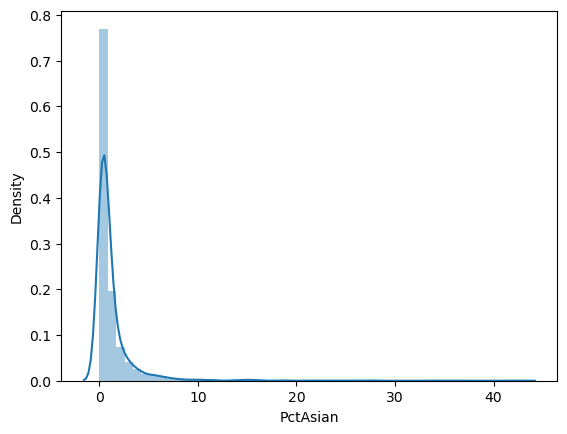

In [551]:
# mean of the data['PctAsian']
print(data['PctAsian'].mean())

# median of the data['PctAsian']
print(data['PctAsian'].median())

# mode of the data['PctAsian']
print(data['PctAsian'].mode())

# max of the data['PctAsian']
print(data['PctAsian'].max())

# min of the data['PctAsian']
print(data['PctAsian'].min())

# skewness of the data['PctAsian']
print(data['PctAsian'].skew())

# distribution of the data['PctAsian']
sns.distplot(data['PctAsian'])

In [552]:
upper_limit = data['PctAsian'].mean() + 1*data['PctAsian'].std()
lower_limit = data['PctAsian'].mean() - 1*data['PctAsian'].std()

data['PctAsian'] = np.where(
    data['PctAsian']>upper_limit,
    upper_limit,
    np.where(
        data['PctAsian']<lower_limit,
        lower_limit,
        data['PctAsian']
    )
)

# skewwness
print(data['PctAsian'].skew())

1.5907821205225265


In [553]:
upper_limit = data['PctAsian'].mean() + 1*data['PctAsian'].std()
lower_limit = data['PctAsian'].mean() - 1*data['PctAsian'].std()

data['PctAsian'] = np.where(
    data['PctAsian']>upper_limit,
    upper_limit,
    np.where(
        data['PctAsian']<lower_limit,
        lower_limit,
        data['PctAsian']
    )
)

# skewwness
print(data['PctAsian'].skew())

0.7869630008351395


In [554]:
upper_limit = data['PctAsian'].mean() + 1*data['PctAsian'].std()
lower_limit = data['PctAsian'].mean() - 1*data['PctAsian'].std()

data['PctAsian'] = np.where(
    data['PctAsian']>upper_limit,
    upper_limit,
    np.where(
        data['PctAsian']<lower_limit,
        lower_limit,
        data['PctAsian']
    )
)

# skewwness
print(data['PctAsian'].skew())

0.44336417620037666


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctAsian', ylabel='Density'>

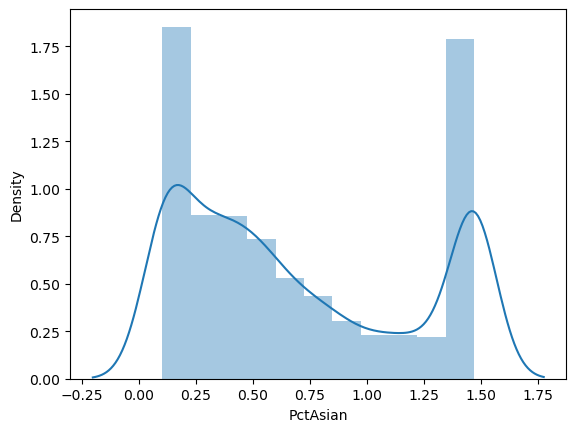

In [555]:
# distribution of the data['PctAsian']

sns.distplot(data['PctAsian'])

In [556]:
data['PctOtherRace']

0        1.843479
1        3.741352
2        2.747358
3        1.362643
4        0.492135
          ...    
3042     1.700468
3043    14.130288
3044     5.680705
3045     2.131790
3046     1.356457
Name: PctOtherRace, Length: 3047, dtype: float64

In [557]:
data['PctOtherRace'].value_counts()

0.000000    140
0.172414      3
0.115075      2
0.222841      2
1.691361      2
           ... 
2.281745      1
0.397219      1
1.189187      1
1.496754      1
1.356457      1
Name: PctOtherRace, Length: 2903, dtype: int64

1.9835230038171976
0.826185211
0    0.0
Name: PctOtherRace, dtype: float64
41.93025142
0.0
4.952179464356409


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctOtherRace', ylabel='Density'>

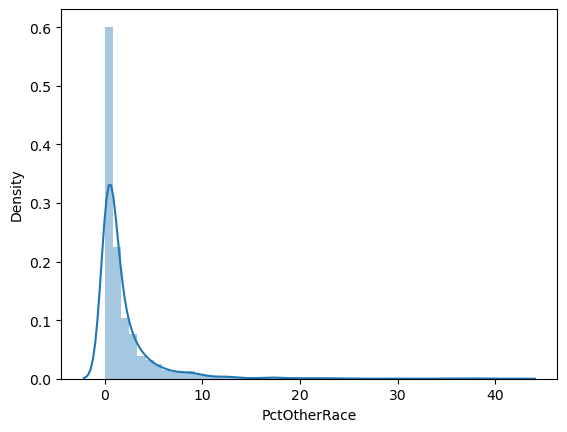

In [558]:
# mean of the data['PctOtherRace']
print(data['PctOtherRace'].mean())

# median of the data['PctOtherRace']
print(data['PctOtherRace'].median())

# mode of the data['PctOtherRace']
print(data['PctOtherRace'].mode())

# max of the data['PctOtherRace']
print(data['PctOtherRace'].max())

# min of the data['PctOtherRace']
print(data['PctOtherRace'].min())

# skewness of the data['PctOtherRace']
print(data['PctOtherRace'].skew())

# distribution of the data['PctOtherRace']
sns.distplot(data['PctOtherRace'])

In [559]:
upper_limit = data['PctOtherRace'].mean() + 1*data['PctOtherRace'].std()
lower_limit = data['PctOtherRace'].mean() - 1*data['PctOtherRace'].std()

data['PctOtherRace'] = np.where(
    data['PctOtherRace']>upper_limit,
    upper_limit,
    np.where(
        data['PctOtherRace']<lower_limit,
        lower_limit,
        data['PctOtherRace']
    )
)

# skewwness
print(data['PctOtherRace'].skew())

1.3008340797290154


In [560]:
upper_limit = data['PctOtherRace'].mean() + 1*data['PctOtherRace'].std()
lower_limit = data['PctOtherRace'].mean() - 1*data['PctOtherRace'].std()

data['PctOtherRace'] = np.where(
    data['PctOtherRace']>upper_limit,
    upper_limit,
    np.where(
        data['PctOtherRace']<lower_limit,
        lower_limit,
        data['PctOtherRace']
    )
)

# skewwness
print(data['PctOtherRace'].skew())

0.6965944665021037


In [561]:
upper_limit = data['PctOtherRace'].mean() + 1*data['PctOtherRace'].std()
lower_limit = data['PctOtherRace'].mean() - 1*data['PctOtherRace'].std()

data['PctOtherRace'] = np.where(
    data['PctOtherRace']>upper_limit,
    upper_limit,
    np.where(
        data['PctOtherRace']<lower_limit,
        lower_limit,
        data['PctOtherRace']
    )
)

# skewwness
print(data['PctOtherRace'].skew())

0.42588015798222484


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctOtherRace', ylabel='Density'>

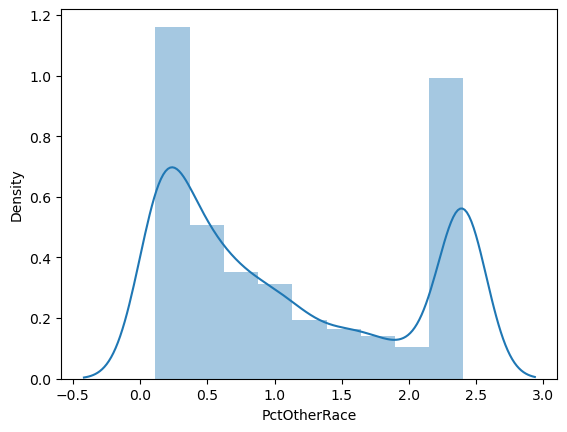

In [562]:
# distribution of the data['PctOtherRace']
sns.distplot(data['PctOtherRace'])

In [563]:
data.shape

(3047, 32)

In [564]:
data['PctMarriedHouseholds']

0       52.856076
1       45.372500
2       54.444868
3       51.021514
4       54.027460
          ...    
3042    51.063830
3043    52.007937
3044    55.153949
3045    58.484232
3046    56.040242
Name: PctMarriedHouseholds, Length: 3047, dtype: float64

In [565]:
data['PctMarriedHouseholds'].value_counts()

47.826087    2
56.466189    2
51.708428    2
50.000000    2
49.635701    1
            ..
44.789283    1
59.576695    1
51.294510    1
54.850257    1
56.040242    1
Name: PctMarriedHouseholds, Length: 3043, dtype: int64

51.243872141463676
51.66994106
0    47.826087
1    50.000000
2    51.708428
3    56.466189
Name: PctMarriedHouseholds, dtype: float64
78.07539683
22.99248989
-0.5223617083391708


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PctMarriedHouseholds', ylabel='Density'>

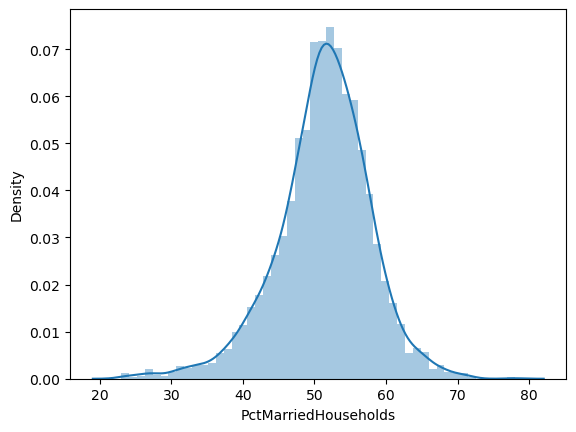

In [566]:
# mean of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].mean())

# median of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].median())

# mode of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].mode())

# max of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].max())

# min of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].min())

# skewness of the data['PctMarriedHouseholds']
print(data['PctMarriedHouseholds'].skew())

# distribution of the data['PctMarriedHouseholds']
sns.distplot(data['PctMarriedHouseholds'])


In [567]:
data['BirthRate']

0       6.118831
1       4.333096
2       3.729488
3       4.603841
4       6.796657
          ...   
3042    7.773512
3043    8.186470
3044    7.809192
3045    7.582938
3046    8.981723
Name: BirthRate, Length: 3047, dtype: float64

In [568]:
data['BirthRate'].value_counts()

0.000000    4
7.142857    3
6.140351    2
6.256983    2
4.361371    2
           ..
3.913309    1
4.953959    1
3.673723    1
6.148433    1
8.981723    1
Name: BirthRate, Length: 3019, dtype: int64

5.640305931184442
5.381477705
0    0.0
Name: BirthRate, dtype: float64
21.32616487
0.0
1.3232027954370265


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BirthRate', ylabel='Density'>

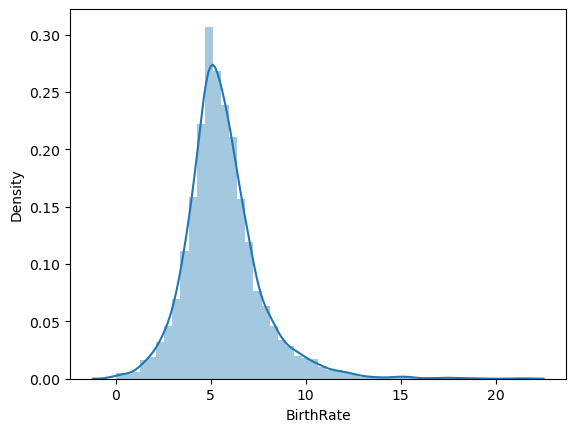

In [569]:
# mean of the data['BirthRate']
print(data['BirthRate'].mean())

# median of the data['BirthRate']
print(data['BirthRate'].median())

# mode of the data['BirthRate']
print(data['BirthRate'].mode())

# max of the data['BirthRate']
print(data['BirthRate'].max())

# min of the data['BirthRate']
print(data['BirthRate'].min())

# skewness of the data['BirthRate']
print(data['BirthRate'].skew())

# distribution of the data['BirthRate']
sns.distplot(data['BirthRate'])

In [570]:
upper_limit = data['BirthRate'].mean() + 2.4*data['BirthRate'].std()
lower_limit = data['BirthRate'].mean() - 2.4*data['BirthRate'].std()

data['BirthRate'] = np.where(
    data['BirthRate']>upper_limit,
    upper_limit,
    np.where(
        data['BirthRate']<lower_limit,
        lower_limit,
        data['BirthRate']
    )
)

# skewwness
print(data['BirthRate'].skew())

0.5115836524292583


In [571]:
from sklearn.preprocessing import StandardScaler

z=data.drop(['TARGET_deathRate'],axis=1)

target=data['TARGET_deathRate']

z=StandardScaler().fit_transform(z)

In [572]:
print(z)

[[ 1.34228352  1.47809391  0.81848801 ...  0.83240235  0.24532391
   0.29423957]
 [-0.11807699  0.02639807 -0.71563771 ...  1.46770522 -0.89342793
  -0.70232221]
 [-0.48744663 -0.23039885 -1.92999041 ...  1.46770522  0.4870854
  -1.03917638]
 ...
 [ 1.57997595 -0.29403602  0.10732504 ...  1.46770522  0.59498396
   1.23757573]
 [ 1.57997595 -0.20046545  0.10732504 ...  1.15927885  1.10174249
   1.11131101]
 [ 1.57997595 -0.26155435  0.10732504 ...  0.28023739  0.72984833
   1.89192805]]


In [573]:
ff=pd.DataFrame(z)

In [574]:
ff.iloc[:,:20].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.342284,1.478094,0.818488,1.275229,1.514897,-0.920066,1.315404,1.218383,-0.338401,-0.511128,-0.084151,0.118041,0.100697,-0.868822,0.496010,0.269047,-1.649849,1.329094,-0.277317,0.059005
1,-0.118077,0.026398,-0.715638,0.217182,0.242098,0.305773,1.315404,0.173418,-1.595883,-1.410622,-1.595872,-0.555681,-1.086702,-1.584341,-1.389694,0.431174,-1.251770,1.963340,0.203656,-0.001875
2,-0.487447,-0.230399,-1.929990,0.322522,-0.269986,-0.356843,1.315404,0.173418,0.799320,0.847682,0.690607,0.387530,0.353019,0.787471,0.176212,0.971599,-0.825256,0.592549,-0.998775,-0.245394
3,0.513592,0.835221,-0.346820,-0.136612,0.640697,0.057292,1.315404,-0.523226,0.360200,0.503195,0.237090,0.050669,0.130382,0.283958,0.683477,-0.919887,-0.455611,-0.778241,-0.710192,1.307039
4,-0.894292,-0.729478,-1.922143,0.373924,-0.774905,-0.704716,-0.760223,0.173418,1.458001,1.574933,1.276399,-0.555681,0.887349,-0.418310,0.881972,-1.054993,-0.199702,0.387954,-0.722216,-0.915071


In [575]:
ff.iloc[:,20:40].head()

,20,21,22,23,24,25,26,27,28,29,30
0,1.009370,NaN,0.042734,-0.427608,-0.857336,-0.661554,-0.360767,1.527530,0.832402,0.245324,0.294240
1,0.549074,0.535888,0.254461,-0.657187,-0.644641,0.214450,-0.813516,1.527530,1.467705,-0.893428,-0.702322
2,-0.061524,-0.490011,-0.666550,0.745793,0.304306,0.413654,-0.877414,-0.460321,1.467705,0.487085,-1.039176
3,-0.559396,-0.808737,-0.655964,1.153933,0.942391,0.510393,-0.865452,0.914968,0.287251,-0.033835,-0.551228
4,-0.258794,-0.450170,-0.645377,0.988126,0.566084,0.787890,-1.008168,-0.064951,-0.699696,0.423570,0.672513


In [576]:
ff.shape

(3047, 31)

In [577]:
target.head()

0    164.9
1    161.3
2    174.7
3    194.8
4    144.4
Name: TARGET_deathRate, dtype: float64

In [578]:
# standard scaler of target
target=StandardScaler().fit_transform(target.values.reshape(-1,1))

In [579]:
target

array([[-0.49605667],
       [-0.62580062],
       [-0.14286478],
       ...,
       [-0.89249653],
       [-0.13205279],
       [ 1.25909075]])

In [580]:
# convert target to dataframe
target=pd.DataFrame(target)

In [581]:
target.head()

,0
0,-0.496057
1,-0.625801
2,-0.142865
3,0.581539
4,-1.234876


In [582]:
# rename the column "0" of target as "New_TARGET_deathRate"
target.rename(columns={0:'New_TARGET_deathRate'},inplace=True)

In [583]:
target.head()

,New_TARGET_deathRate
0,-0.496057
1,-0.625801
2,-0.142865
3,0.581539
4,-1.234876


In [584]:
target.shape

(3047, 1)

In [585]:
predf=pd.concat([ff,target],axis=1)

In [586]:
predf.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,New_TARGET_deathRate
0,1.342284,1.478094,0.818488,1.275229,1.514897,-0.920066,1.315404,1.218383,-0.338401,-0.511128,...,0.042734,-0.427608,-0.857336,-0.661554,-0.360767,1.527530,0.832402,0.245324,0.294240,-0.496057
1,-0.118077,0.026398,-0.715638,0.217182,0.242098,0.305773,1.315404,0.173418,-1.595883,-1.410622,...,0.254461,-0.657187,-0.644641,0.214450,-0.813516,1.527530,1.467705,-0.893428,-0.702322,-0.625801
2,-0.487447,-0.230399,-1.929990,0.322522,-0.269986,-0.356843,1.315404,0.173418,0.799320,0.847682,...,-0.666550,0.745793,0.304306,0.413654,-0.877414,-0.460321,1.467705,0.487085,-1.039176,-0.142865
3,0.513592,0.835221,-0.346820,-0.136612,0.640697,0.057292,1.315404,-0.523226,0.360200,0.503195,...,-0.655964,1.153933,0.942391,0.510393,-0.865452,0.914968,0.287251,-0.033835,-0.551228,0.581539
4,-0.894292,-0.729478,-1.922143,0.373924,-0.774905,-0.704716,-0.760223,0.173418,1.458001,1.574933,...,-0.645377,0.988126,0.566084,0.787890,-1.008168,-0.064951,-0.699696,0.423570,0.672513,-1.234876


In [587]:
predf.shape

(3047, 32)

In [588]:
# checking any missing values in "predf" dataframe
predf.isnull().sum()[predf.isnull().sum()>0]

21    1
dtype: int64

In [589]:
# removing the missing values
predf.dropna(inplace=True)

In [590]:
from sklearn.model_selection import train_test_split

X = predf.drop('New_TARGET_deathRate',axis=1)

y = predf['New_TARGET_deathRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=500)

In [591]:
# linear regression model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)


print('Coefficients: \n', lm.coef_)


print("Mean squared error: %.2f"

        % np.mean((lm.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % lm.score(X_test, y_test))

# R2 score

from sklearn.metrics import r2_score

r2_score(y_test, lm.predict(X_test))


Coefficients: 
 [-1.27825533e-01  5.07925302e+00  1.64826424e-01  9.50505848e-02
 -5.30157289e+00  4.34865622e-02 -3.94362383e-02  3.46262330e-02
  1.13904989e-02  1.48153483e-03 -5.28972989e-01  2.23946445e-02
 -2.60110094e-02  1.50215667e-02  1.11808843e-01 -1.09174853e-03
 -5.20161439e-02 -7.71830895e-02 -1.12634283e-01  1.24556709e-01
  1.74186995e-02 -1.81135244e-02 -2.24441229e-02 -7.03004017e-01
  5.01291093e-01  1.12941401e-02  3.67011700e-02  2.58328574e-02
 -7.23623188e-02  3.46855579e-02 -3.27006945e-02]
Mean squared error: 0.22
Variance score: 0.78


0.7847707202817669

In [592]:
# Training the ridge regression model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

# finding accuracy of the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))

print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

print('R2:', metrics.r2_score(y_test, ridge_pred))

MAE: 0.49841411178326867
MSE: 0.45990161812979924
RMSE: 0.6781604663571884
R2: 0.5516236331036288


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [593]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 10.0, 100.0]}

grid = GridSearchCV(Ridge(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................

{'alpha': 0.1}

In [594]:
grid.best_estimator_

Ridge(alpha=0.1)

In [595]:
grid.best_score_

0.7548751168187292

In [596]:
grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))

MAE: 0.3427245017932198
MSE: 0.22055967094123927
RMSE: 0.46963780825359375
R2: 0.7849676103714405


In [597]:
# Training the lasso regression model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train,y_train)

lasso_pred = lasso.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))

print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

print('R2:', metrics.r2_score(y_test, lasso_pred))



MAE: 0.7775328174372355
MSE: 1.0289347250920502
RMSE: 1.0143641974616662
R2: -0.0031493598269574097


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [598]:
# Tuning the model using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 1000.0]}
grid = GridSearchCV(Lasso(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid.best_score_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

0.4410097708929242

In [599]:
grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))

MAE: 0.5562190713730153
MSE: 0.5571995208102197
RMSE: 0.746457983285208
R2: 0.45676404055013853


In [600]:
# Training the elastic net regression model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, normalize=True)

elasticnet.fit(X_train,y_train)

elasticnet_pred = elasticnet.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, elasticnet_pred))

print('MSE:', metrics.mean_squared_error(y_test, elasticnet_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elasticnet_pred)))

print('R2:', metrics.r2_score(y_test, elasticnet_pred))

MAE: 0.7775328174372355
MSE: 1.0289347250920502
RMSE: 1.0143641974616662
R2: -0.0031493598269574097


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


In [601]:
# Tuning the model using GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(ElasticNet(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

0.4702155784955832

In [408]:
grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))

MAE: 0.5339263785952452
MSE: 0.5225967508987202
RMSE: 0.7229085356383061
R2: 0.4904996562684776


By analyzing various model we found the best "R2: 0.7849676103714405" value from Ridge Regression model tuning with various parameters by grid search.